## Perturbative footprint study: data creation

### Imports

In [10]:
# Standard imports
import numpy as np
import shutil
from ruamel.yaml import YAML
import os
import matplotlib.pyplot as plt
import pickle
import subprocess
import time
import pandas as pd
from matplotlib.backends.backend_pdf import PdfPages

# Cern modules
import fillingpatterns as fp
import xtrack as xt

# Improve style
import matplotlib
import seaborn as sns

sns.set_theme(style="whitegrid")
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
#sns.set(font='Adobe Devanagari')
sns.set_context("paper", font_scale=0.8, rc={"lines.linewidth": 0.2, "grid.linewidth": 0.1})


matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
# Not italized latex
matplotlib.rcParams['mathtext.default'] = 'regular'
matplotlib.rcParams["font.weight"] = "light"

%config InlineBackend.figure_format='retina'


### Get machine (built in the script compare_footprints.py)

In [11]:
collider = xt.Multiline.from_json("output/collider_tuned_bb_on.json")
collider.build_trackers()

Done loading line from dict.           
Done loading line from dict.           
Done loading line from dict.           
Done loading line from dict.           
Compiling ContextCpu kernels...


18859db49e1b4ae0ac1e2f197154e672.c:4280: warning: "_GNU_SOURCE" redefined
 4280 | #  define _GNU_SOURCE // enable GNU libc NAN extension if possible
      | 
In file included from 18859db49e1b4ae0ac1e2f197154e672.c:50:
/afs/cern.ch/work/c/cdroin/private/xmask_DA_study/miniconda/include/python3.10/pyconfig.h:1621: note: this is the location of the previous definition
 1621 | #define _GNU_SOURCE 1
      | 


Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...


060c079ffa4b469abb79e2f2195f0a8c.c:4280: warning: "_GNU_SOURCE" redefined
 4280 | #  define _GNU_SOURCE // enable GNU libc NAN extension if possible
      | 
In file included from 060c079ffa4b469abb79e2f2195f0a8c.c:50:
/afs/cern.ch/work/c/cdroin/private/xmask_DA_study/miniconda/include/python3.10/pyconfig.h:1621: note: this is the location of the previous definition
 1621 | #define _GNU_SOURCE 1
      | 


Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.


### Correct bbb schedule

In [12]:
# Get BB schedule
fname = "filling_scheme/8b4e_1972b_1960_1178_1886_224bpi_12inj_800ns_bs200ns.json"
patt = fp.FillingPattern.from_json(fname)

# Compute bb schedule
patt.compute_beam_beam_schedule(n_lr_per_side=25)
bbs_b1 = patt.b1.bb_schedule
bbs_b2 = patt.b2.bb_schedule

# Get list of bunches
bbs_b1

Computing collision schedules...
Done Beam 1
Done Beam 2


,HO partner in ALICE,# of LR in ALICE,BB partners in ALICE,Positions in ALICE,HO partner in ATLAS/CMS,# of LR in ATLAS/CMS,BB partners in ATLAS/CMS,Positions in ATLAS/CMS,HO partner in LHCB,# of LR in LHCB,BB partners in LHCB,Positions in LHCB,collides in ATLAS/CMS,collides in ALICE,collides in LHCB
12,903.0,23,"[879.0, 880.0, 881.0, 882.0, 883.0, 884.0, 885...","[-24.0, -23.0, -22.0, -21.0, -20.0, -19.0, -18...",NaN,12,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[-12.0, -11.0, -10.0, -9.0, -8.0, -7.0, -6.0, ...",2682.0,29,"[2657.0, 2658.0, 2659.0, 2660.0, 2661.0, 2662....","[-25.0, -24.0, -23.0, -22.0, -21.0, -20.0, -15...",False,True,True
13,904.0,23,"[879.0, 880.0, 881.0, 882.0, 883.0, 884.0, 885...","[-25.0, -24.0, -23.0, -22.0, -21.0, -20.0, -19...",NaN,12,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[-13.0, -12.0, -11.0, -10.0, -9.0, -8.0, -7.0,...",2683.0,28,"[2658.0, 2659.0, 2660.0, 2661.0, 2662.0, 2667....","[-25.0, -24.0, -23.0, -22.0, -21.0, -16.0, -15...",False,True,True
14,905.0,22,"[880.0, 881.0, 882.0, 883.0, 884.0, 885.0, 886...","[-25.0, -24.0, -23.0, -22.0, -21.0, -20.0, -19...",NaN,12,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[-14.0, -13.0, -12.0, -11.0, -10.0, -9.0, -8.0...",2684.0,27,"[2659.0, 2660.0, 2661.0, 2662.0, 2667.0, 2668....","[-25.0, -24.0, -23.0, -22.0, -17.0, -16.0, -15...",False,True,True
15,906.0,21,"[881.0, 882.0, 883.0, 884.0, 885.0, 886.0, 891...","[-25.0, -24.0, -23.0, -22.0, -21.0, -20.0, -15...",NaN,12,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[-15.0, -14.0, -13.0, -12.0, -11.0, -10.0, -9....",2685.0,26,"[2660.0, 2661.0, 2662.0, 2667.0, 2668.0, 2669....","[-25.0, -24.0, -23.0, -18.0, -17.0, -16.0, -15...",False,True,True
16,907.0,20,"[882.0, 883.0, 884.0, 885.0, 886.0, 891.0, 892...","[-25.0, -24.0, -23.0, -22.0, -21.0, -16.0, -15...",NaN,12,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[-16.0, -15.0, -14.0, -13.0, -12.0, -11.0, -10...",2686.0,25,"[2661.0, 2662.0, 2667.0, 2668.0, 2669.0, 2670....","[-25.0, -24.0, -19.0, -18.0, -17.0, -16.0, -15...",False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3438,765.0,23,"[741.0, 742.0, 743.0, 744.0, 745.0, 746.0, 747...","[-24.0, -23.0, -22.0, -21.0, -20.0, -19.0, -18...",3438.0,21,"[3413.0, 3414.0, 3415.0, 3416.0, 3417.0, 3418....","[-25.0, -24.0, -23.0, -22.0, -21.0, -20.0, -15...",2544.0,21,"[2519.0, 2520.0, 2521.0, 2522.0, 2523.0, 2524....","[-25.0, -24.0, -23.0, -22.0, -21.0, -20.0, -15...",True,True,True
3439,766.0,23,"[741.0, 742.0, 743.0, 744.0, 745.0, 746.0, 747...","[-25.0, -24.0, -23.0, -22.0, -21.0, -20.0, -19...",3439.0,20,"[3414.0, 3415.0, 3416.0, 3417.0, 3418.0, 3423....","[-25.0, -24.0, -23.0, -22.0, -21.0, -16.0, -15...",2545.0,20,"[2520.0, 2521.0, 2522.0, 2523.0, 2524.0, 2529....","[-25.0, -24.0, -23.0, -22.0, -21.0, -16.0, -15...",True,True,True
3440,767.0,22,"[742.0, 743.0, 744.0, 745.0, 746.0, 747.0, 748...","[-25.0, -24.0, -23.0, -22.0, -21.0, -20.0, -19...",3440.0,19,"[3415.0, 3416.0, 3417.0, 3418.0, 3423.0, 3424....","[-25.0, -24.0, -23.0, -22.0, -17.0, -16.0, -15...",2546.0,19,"[2521.0, 2522.0, 2523.0, 2524.0, 2529.0, 2530....","[-25.0, -24.0, -23.0, -22.0, -17.0, -16.0, -15...",True,True,True
3441,768.0,21,"[743.0, 744.0, 745.0, 746.0, 747.0, 748.0, 753...","[-25.0, -24.0, -23.0, -22.0, -21.0, -20.0, -15...",3441.0,18,"[3416.0, 3417.0, 3418.0, 3423.0, 3424.0, 3425....","[-25.0, -24.0, -23.0, -18.0, -17.0, -16.0, -15...",2547.0,18,"[2522.0, 2523.0, 2524.0, 2529.0, 2530.0, 2531....","[-25.0, -24.0, -23.0, -18.0, -17.0, -16.0, -15...",True,True,True


In [13]:
def fix_bb_elements(collider, bunch_nb, reset_collider=True, also_beam_2=False, print_final_result=False):
    # Reset collider
    if reset_collider:
        for i, x in enumerate(collider.lhcb1.element_names):
            if "bb_lr" in x or "bb_ho" in x:
                try:
                    collider.lhcb1.vars[x + '_scale_strength'] = collider.lhcb1.vars['beambeam_scale']
                    collider.lhcb1.element_refs[x].scale_strength = collider.lhcb1.vars[x + '_scale_strength']
                except Exception as e:
                    print(e)
                    print(f"Failed to reset {x}")
                    
                
        for i, x in enumerate(collider.lhcb2.element_names):
            if "bb_lr" in x or "bb_ho" in x:
                try:
                    collider.lhcb2.vars[x + '_scale_strength'] = collider.lhcb2.vars['beambeam_scale']
                    collider.lhcb2.element_refs[x].scale_strength = collider.lhcb2.vars[x + '_scale_strength']
                except Exception as e:
                    print(e)
                    print(f"Failed to reset {x}")

    # Take care of LR elements
    for ip, name_position in zip(
        [1, 2, 5, 8],
        [
            "Positions in ATLAS/CMS",
            "Positions in ALICE",
            "Positions in ATLAS/CMS",
            "Positions in LHCB",
        ],
    ):
        # Deactivate elements that shouldn't be here in beam 1
        idx_elements_b1 = bbs_b1.loc[bunch_nb][name_position]
        for i, x in enumerate(collider.lhcb1.element_names):
            # print(collider.lhcb1[x].to_dict())
            # First look for bb_elements for current IP
            if "bb_lr.l" + str(ip) in x or "bb_lr.r" + str(ip) in x:
                # Then only keep elements corresponding to the current IP
                pos = int(x.split("_")[2])
                if "l" in x.split("lr.")[1]:
                    pos = -pos
                if pos not in idx_elements_b1:
                    collider.lhcb1.element_refs[x].scale_strength = 0

        # Same with beam 2
        if also_beam_2:
            idx_elements_b2 = bbs_b2.loc[bunch_nb][name_position]
            for i, x in enumerate(collider.lhcb2.element_names):
                if "bb_lr.l" + str(ip) in x or "bb_lr.r" + str(ip) in x:
                    pos = int(x.split("_")[2])
                    if "l" in x.split("lr.")[1]:
                        pos = -pos
                    if pos not in idx_elements_b2:
                        collider.lhcb2.vars[x + '_scale_strength'] = 0

    # Take care of HO elements
    for ip, bool_collide in zip(
        [1, 2, 5, 8],
        ["collides in ATLAS/CMS", "collides in ALICE", "collides in ATLAS/CMS", "collides in LHCB"],
    ):
        collide_b1 = bbs_b1.loc[bunch_nb][bool_collide]

        # Deactivate elements that shouldn't be here in beam 1
        for i, x in enumerate(collider.lhcb1.element_names):
            # First look for bb_elements
            if (
                "bb_ho.l" + str(ip) in x or "bb_ho.r" + str(ip) in x or "bb_ho.c" + str(ip) in x
            ) and not collide_b1:
                collider.lhcb1.element_refs[x].scale_strength = 0

        # Same with beam 2
        if also_beam_2:
            collide_b2 = bbs_b2.loc[bunch_nb][bool_collide]
            for i, x in enumerate(collider.lhcb2.element_names):
                if (
                    "bb_ho.l" + str(ip) in x or "bb_ho.r" + str(ip) in x or "bb_ho.c" + str(ip) in x
                ) and not collide_b2:
                    collider.lhcb2.vars[x + '_scale_strength'] = 0

    # Print final result
    if print_final_result:
        # Beam 1
        print("Beam 1")
        for i, x in enumerate(collider.lhcb1.element_names):
            if "bb_ho" in x or "bb_lr" in x:
                print(x, collider.lhcb1.element_refs[x].scale_strength._value)

        # Beam 2
        if also_beam_2:
            print("Beam 2")
            for i, x in enumerate(collider.lhcb2.element_names):
                if "bb_ho" in x or "bb_lr" in x:
                    print(x, collider.lhcb2.element_refs[x].scale_strength._value)

    # Return collider
    return collider

### Get DA for each bunch

In [14]:
# Load dataframe for DA
path = "/afs/cern.ch/work/c/cdroin/private/DA_study/master_study/opt_flathv_75_1500_withBB_chroma15_1p4_all_bunches"
df = pd.read_parquet(f"{path}/da.parquet")

# Round all numbers to 3 decimals
df = df.round(3)

# Get list of bunches and list of DA
l_bunch_nb_from_DA = df["bunch_nb"]
l_DA = df["normalized amplitude in xy-plane"]

Coupling correction due to the lattice (```delta_cmr``` and ```delta_cmi``` in pymask) are ignored as they're not very relevant for the coupling study.

### Get footprint for a selected set bunches

In [15]:
def return_footprint(collider, bunch_nb, n_turns, perturbative=True, mimic_initial_condition = False):
    # Adapt collider for current bunch
    collider = fix_bb_elements(
        collider, bunch_nb, reset_collider=True, also_beam_2=False, print_final_result=False
    )

    # Freeze longitudinal motion for the tracking
    #with xt.freeze_longitudinal(collider["lhcb1"]):
    collider["lhcb1"].freeze_longitudinal(True)
    # Get footprint
    if mimic_initial_condition:

        # First get initial condition that was built to compute DA
        r_max, r_min = 7, 2
        radial_list_to_mimic = np.linspace(r_min, r_max, 2 * 16 * (r_max - r_min), endpoint=False)
        n_angles = 5
        theta_list_to_mimic = np.linspace(0, 90, n_angles + 2)[1:-1]

        # Then reproduce this initial condition, knowing that the distributions are generated with
        # np.linspace(..., endpoint=True) in the footprint code
        fp_polar_xm = collider["lhcb1"].get_footprint(
            nemitt_x=2.5e-6,
            nemitt_y=2.5e-6,
            n_turns=n_turns,
            mode = 'polar',
            r_range = (radial_list_to_mimic[0],radial_list_to_mimic[-1]),
            n_r = len(radial_list_to_mimic),
            theta_range = (theta_list_to_mimic[0]/180*np.pi, theta_list_to_mimic[-1]/180*np.pi),
            n_theta = len(theta_list_to_mimic),
            linear_rescale_on_knobs=[
                xt.LinearRescale(knob_name="beambeam_scale", v0=0.0, dv=0.05)
            ] if perturbative else None,
        )
    else:
        fp_polar_xm = collider["lhcb1"].get_footprint(
            nemitt_x=2.5e-6,
            nemitt_y=2.5e-6,
            n_turns=n_turns,
            linear_rescale_on_knobs=[
                xt.LinearRescale(knob_name="beambeam_scale", v0=0.0, dv=0.05)
            ] if perturbative else None,
        )
    collider["lhcb1"].freeze_longitudinal(False)        

    return [fp_polar_xm.qx, fp_polar_xm.qy]

In [16]:
FORCE_COMPUTE = True
if FORCE_COMPUTE:
    # Get bunch nb corresponding to percentile 0, 25, 50, 75, 100 of the DA
    l_bunch_nb_sampled = []
    l_DA_sampled = []
    for p in [0, 25, 50, 75, 100]:
        bunch_with_proper_DA = l_bunch_nb_from_DA[l_DA == l_DA.quantile(p / 100)]
        l_bunch_nb_sampled.append(bunch_with_proper_DA.iloc[len(bunch_with_proper_DA) // 2])
        l_DA_sampled.append(l_DA.quantile(p / 100))

    # Get the 4 footprints for each bunch
    dic_footprints = {bunch_nb:[] for bunch_nb in l_bunch_nb_sampled}
    n_turns = 2000
    for bunch_nb in l_bunch_nb_sampled:
        dic_footprints[bunch_nb].append(return_footprint(collider, bunch_nb, n_turns=n_turns, perturbative=False, mimic_initial_condition = False))
        dic_footprints[bunch_nb].append(return_footprint(collider, bunch_nb, n_turns=n_turns, perturbative=True, mimic_initial_condition = False))
        dic_footprints[bunch_nb].append(return_footprint(collider, bunch_nb, n_turns=n_turns, perturbative=False, mimic_initial_condition = True))
        dic_footprints[bunch_nb].append(return_footprint(collider, bunch_nb, n_turns=n_turns, perturbative=True, mimic_initial_condition = True))

    # Save dic_footprints as it is long to compute
    with open('output/dic_footprints_perturbative_mimic.pkl', "wb") as f:
        pickle.dump(dic_footprints, f)
    

In [17]:
# Load dic_footprints
with open('output/dic_footprints_perturbative_mimic.pkl', "rb") as f:
    dic_footprints = pickle.load(f)

# Rebuild bunch list and DA list
l_bunch_nb_sampled = dic_footprints.keys()
l_DA_sampled = [l_DA[l_bunch_nb_from_DA == bunch_nb].iloc[len(l_DA[l_bunch_nb_from_DA == bunch_nb]) // 2] for bunch_nb in l_bunch_nb_sampled]

# Sort both lists by increasing DA
l_bunch_nb_sampled = [bunch_nb for _, bunch_nb in sorted(zip(l_DA_sampled, l_bunch_nb_sampled))]
l_DA_sampled = sorted(l_DA_sampled)


In [18]:
# Remove outliers
for bunch in dic_footprints:
    for i, fp in enumerate(dic_footprints[bunch]):
        for j, val in enumerate(fp[1].flatten()):
            if val < 0.29:
                print(f"Outlier found for bunch {bunch}, fp {i}, value {j}")
                fp[0].flat[j] = np.nan
                fp[1].flat[j] = np.nan 
     

Outlier found for bunch 91.0, fp 3, value 156
Outlier found for bunch 90.0, fp 1, value 9


### Plot sample footprints

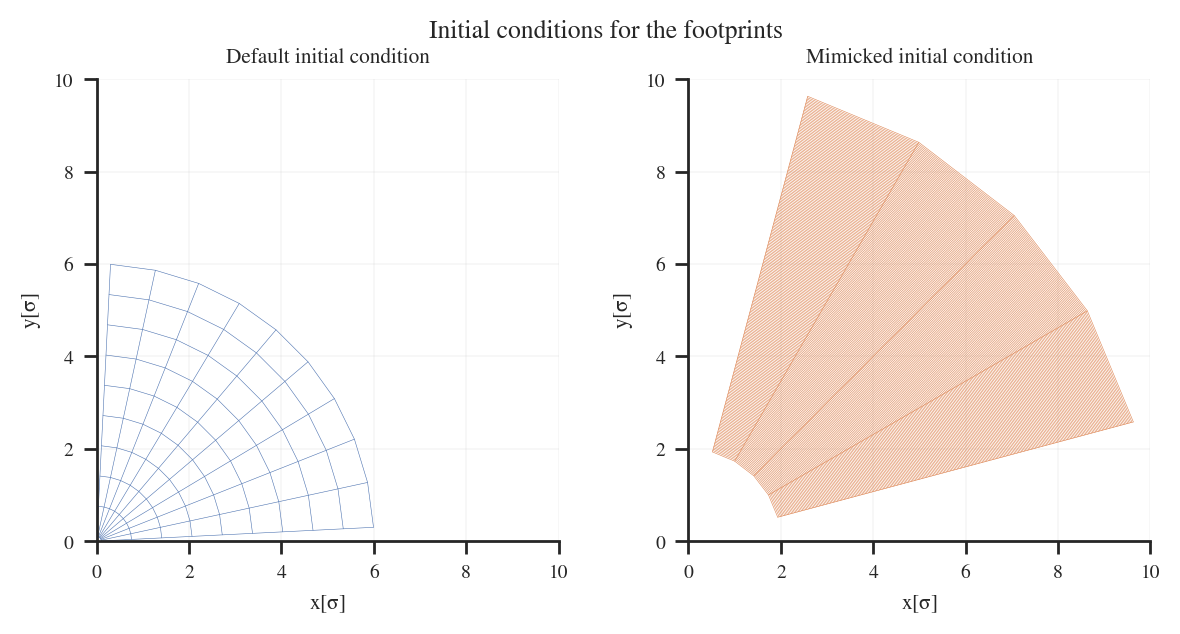

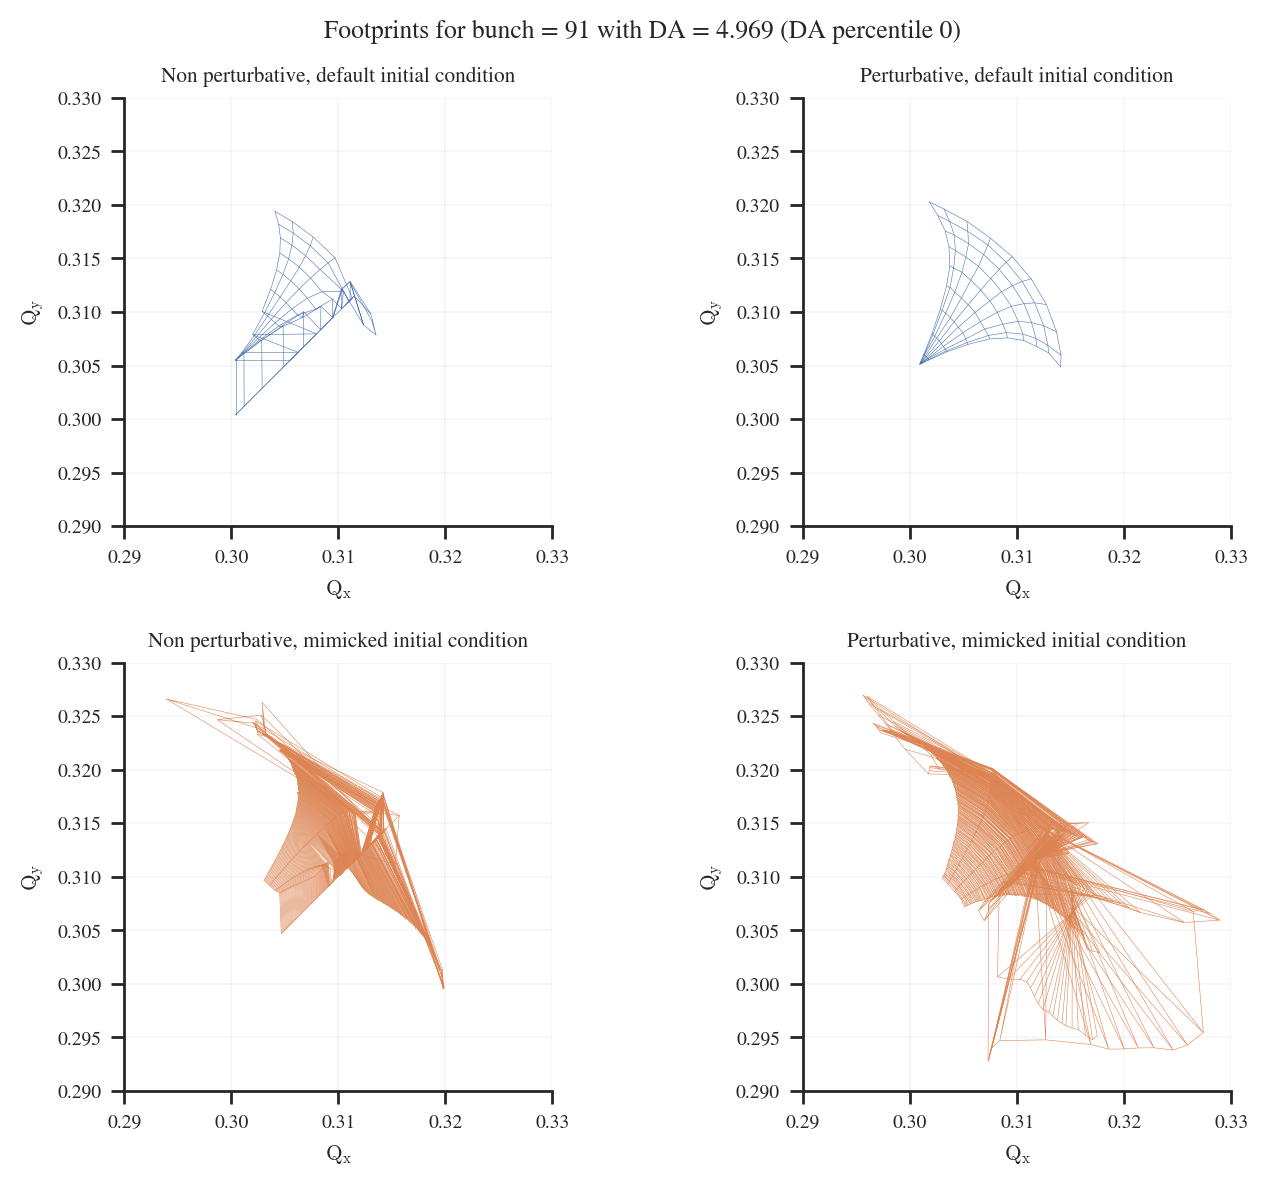

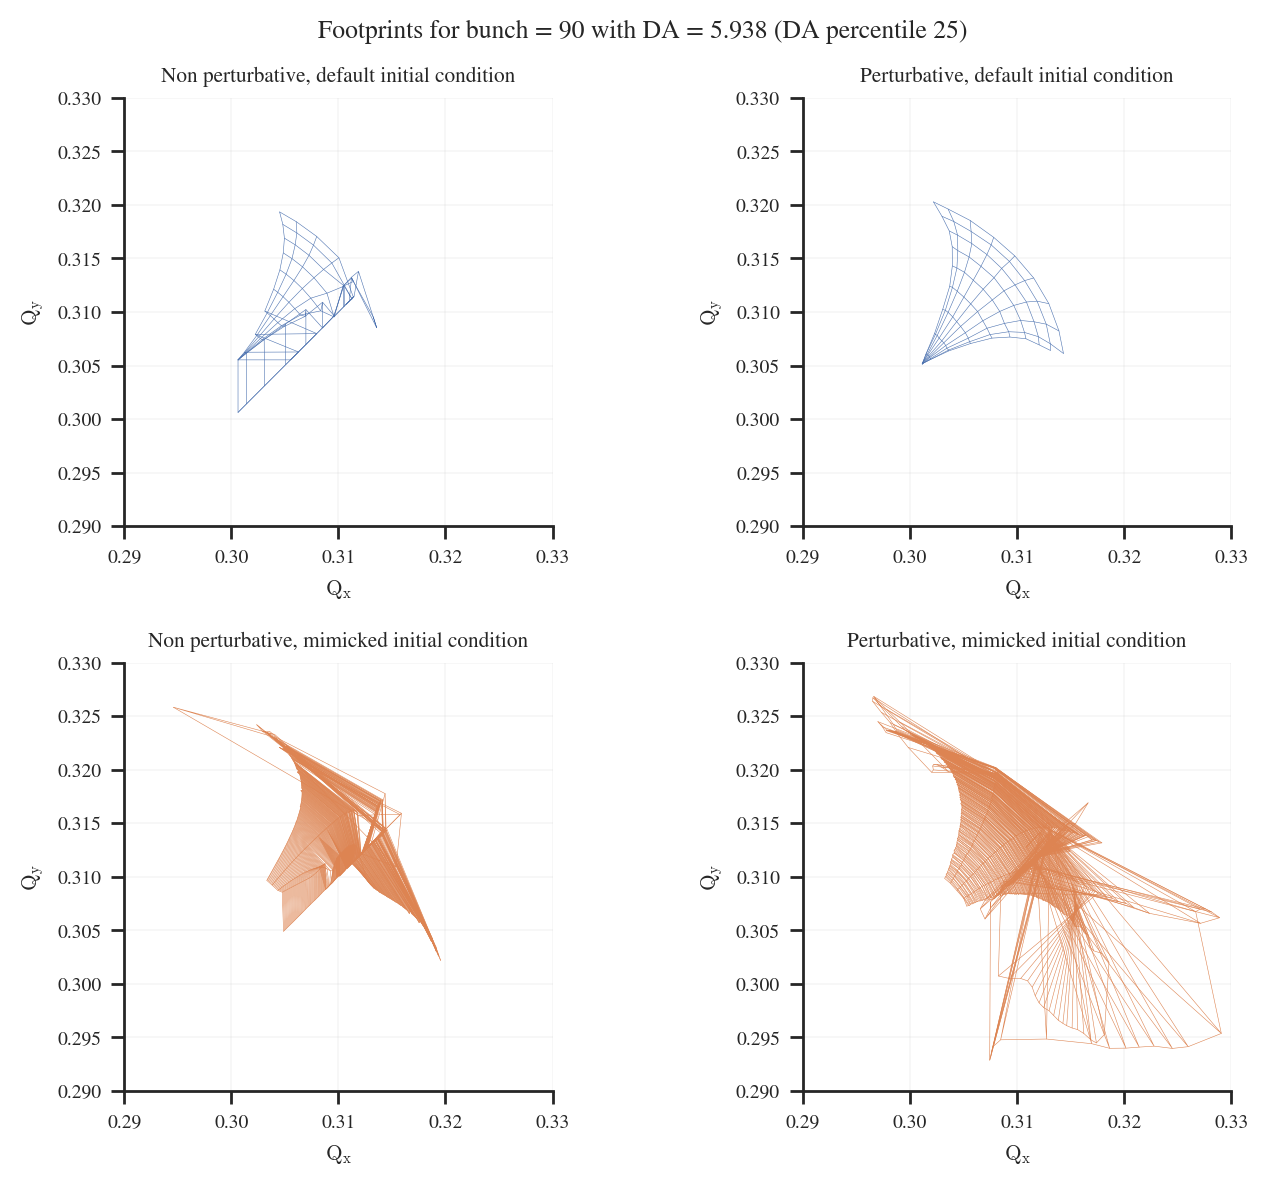

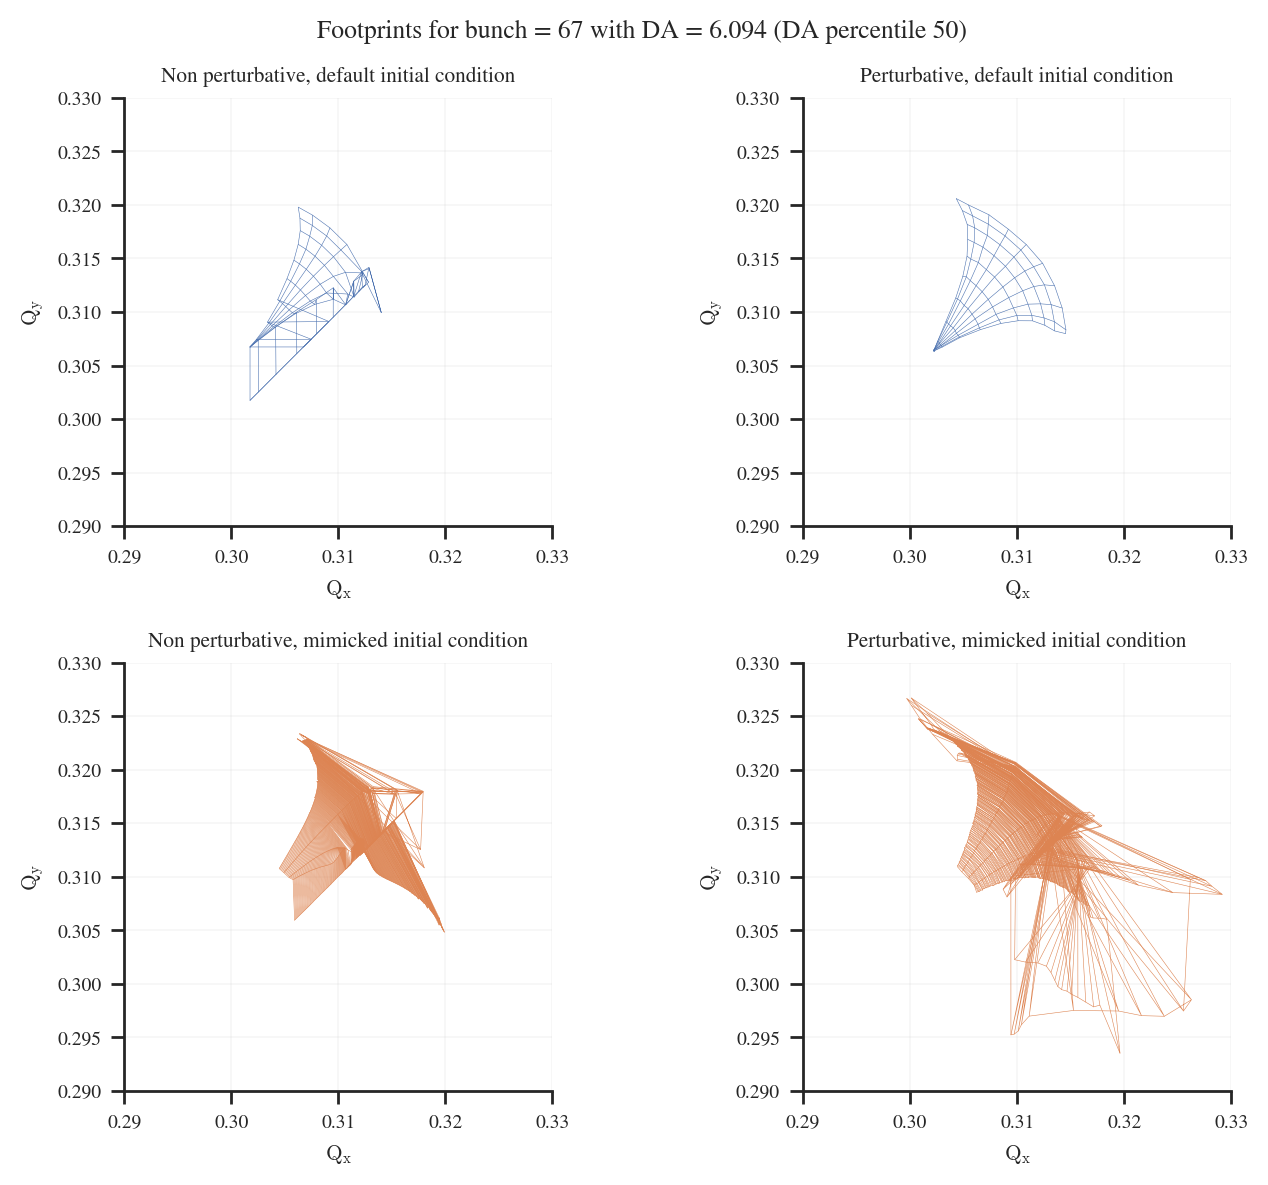

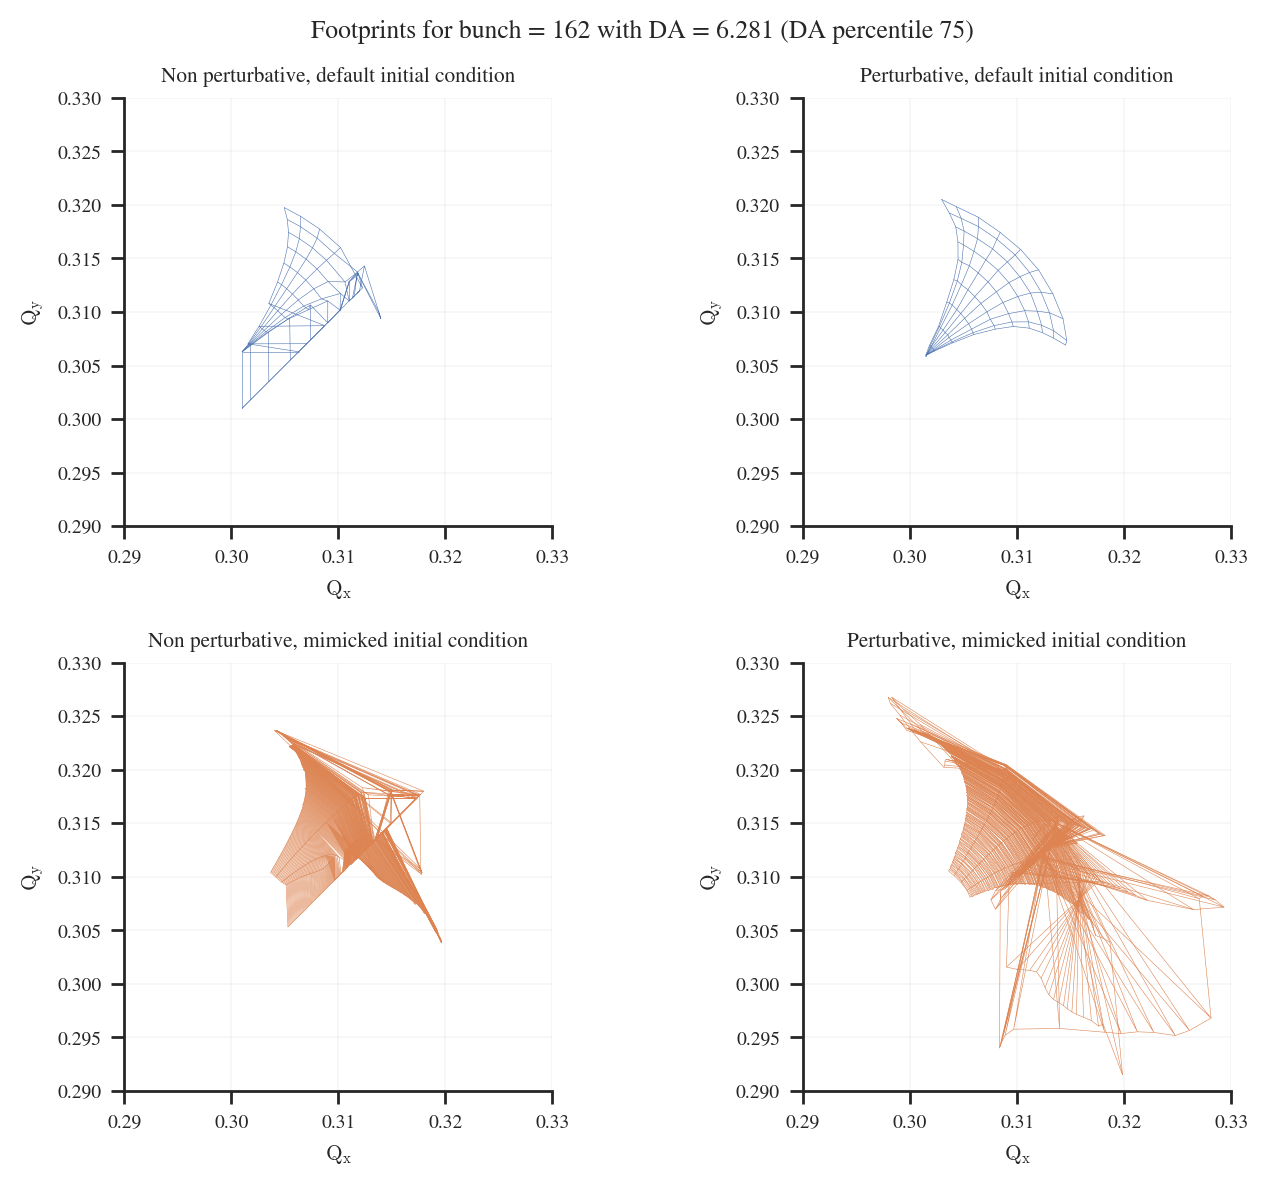

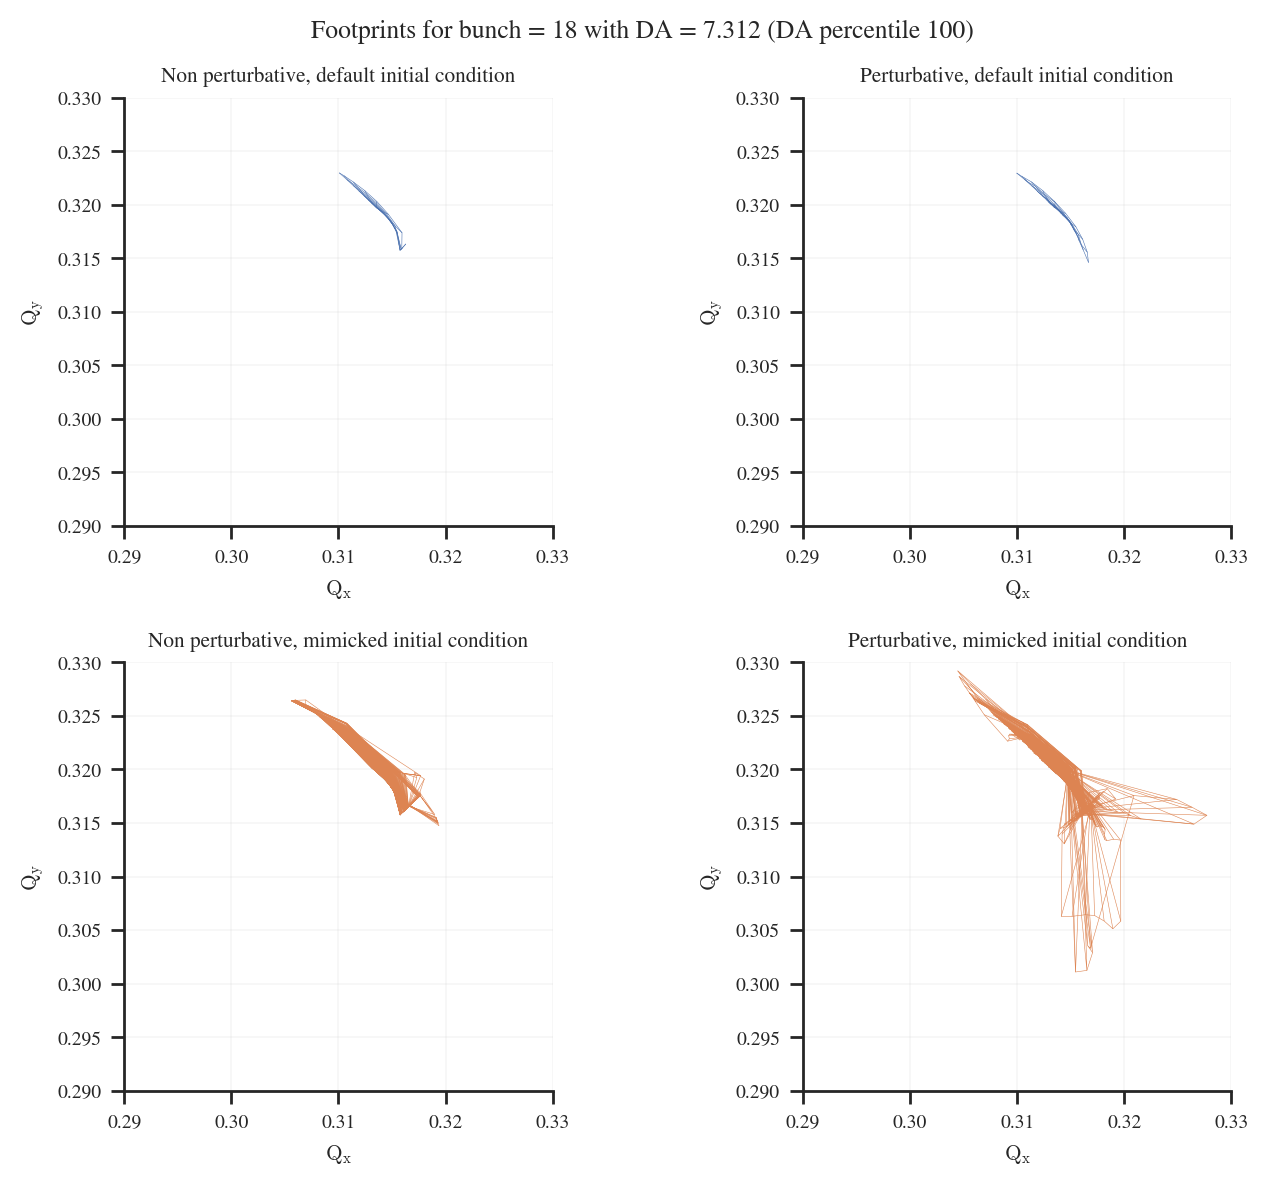

In [19]:
with PdfPages('output/compare_footprints.pdf') as export_pdf:
    # Plot initial conditions
    fig, axs = plt.subplots(1, 2, figsize=(2*3.5, 1*3))

    # Plot default initial condition
    ax = axs[0]
    r_range = (0.1, 6)
    theta_range = (0.05, np.pi/2-0.05)
    n_r = 10
    n_theta = 10
    radial_list = np.linspace(r_range[0], r_range[1], n_r, endpoint=True)
    theta_list = np.linspace(theta_range[0], theta_range[1], n_theta, endpoint=True)
    radial_mesh, theta_mesh = np.meshgrid(radial_list, theta_list)
    x_mesh = radial_mesh * np.cos(theta_mesh)
    y_mesh = radial_mesh * np.sin(theta_mesh)
    ax.set_title("Default initial condition")
    ax.set_xlabel(r"$x [\sigma]$")
    ax.set_ylabel(r"$y [\sigma]$")
    ax.plot(x_mesh, y_mesh, color="C0")
    ax.plot(x_mesh.T, y_mesh.T, color="C0")
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    ax.grid()
    ax.set_aspect('equal')

    # Plot mimicked initial condition
    ax = axs[1]
    r_max, r_min = 10, 2
    radial_list_to_mimic = np.linspace(r_min, r_max, 2 * 16 * (r_max - r_min), endpoint=False)
    n_angles = 5
    theta_list_to_mimic = np.linspace(0, 90, n_angles + 2)[1:-1]
    radial_list = np.linspace(radial_list_to_mimic[0], radial_list_to_mimic[-1], len(radial_list_to_mimic), endpoint=True)
    theta_list = np.linspace(theta_list_to_mimic[0]/180*np.pi, theta_list_to_mimic[-1]/180*np.pi, len(theta_list_to_mimic), endpoint=True)
    radial_mesh, theta_mesh = np.meshgrid(radial_list, theta_list)
    x_mesh = radial_mesh * np.cos(theta_mesh)
    y_mesh = radial_mesh * np.sin(theta_mesh)
    ax.set_title("Mimicked initial condition")
    ax.set_xlabel(r"$x [\sigma]$")
    ax.set_ylabel(r"$y [\sigma]$")
    ax.plot(x_mesh, y_mesh, color="C1")
    ax.plot(x_mesh.T, y_mesh.T, color="C1")
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    ax.set_aspect('equal')
    ax.grid()
    plt.suptitle("Initial conditions for the footprints")
    #plt.tight_layout()
    plt.show()
    export_pdf.savefig(fig, bbox_inches='tight')
    plt.close()

    for bunch_nb, DA, percentile in zip(l_bunch_nb_sampled, l_DA_sampled, [0,25,50,75,100]):
        l_fp = dic_footprints[bunch_nb]

        # Make a grid of 2*2 plots for the footprints
        n_cols = 2
        n_rows = 2
        fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*3.5, n_rows*3),)
        for i, (fp, title) in enumerate(zip(l_fp, ['Non perturbative, default initial condition', 'Perturbative, default initial condition', 'Non perturbative, mimicked initial condition', 'Perturbative, mimicked initial condition'])):
            ax = axs[i//n_cols, i%n_cols]
            ax.plot(fp[0], fp[1], color="C0" if i<2 else "C1")
            ax.plot(fp[0].T, fp[1].T, color="C0" if i<2 else "C1")
            ax.set_xlabel(r"$\mathrm{Q_x}$")
            ax.set_ylabel(r"$\mathrm{Q_y}$")
            ax.set_xlim(0.29, 0.33)
            ax.set_ylim(0.29, 0.33)
            ax.grid()
            #ax.set_aspect("equal")
            ax.set_title(title)
            ax.set_aspect('equal')

        plt.suptitle(f"Footprints for bunch = {int(bunch_nb)} with DA = {DA} (DA percentile {np.round(percentile, 2)})")
        #plt.axis('square')
        plt.tight_layout()
        plt.show()
        export_pdf.savefig(fig, bbox_inches='tight')
        plt.close()
